2020/03/22
# Foward Neural Network (FNN) 

## Table of Contents:
#### 1. Single Layer FNN from scratch
#### 2. Multiple Layers FNN from scratch
#### 3. FNN using Tensor Flow



In [148]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### 1. Single Layer FNN

In [263]:
# Single layer FNN

def sigmoid(x):
    return 1/(1+np.exp(-x))

def binceloss(y, y_pred):
    N = y.shape[0]
    loss = -1/N * np.sum((y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))
    return loss




class singleFNN:
    

    def __init__(self, alpha, epoch):
        self.alpha = alpha
        self.epoch = epoch
        self.losses = []
    
    def fit(self, X, y):
        
        W = 2*np.random.random((3,1))-1
        b = 0

        N = y.shape[0]
        losses = []


        for i in range(self.epoch):
            
            # foward propagation
            Z = X.dot(W) + b
            A = sigmoid(Z)

            # loss calculation
            loss = binceloss(y, A)
            self.losses.append(loss)
            print('Epoch:', i, ' Loss:', loss)

            # backword propagation
            dZ = A - y
            dW = 1/N * np.dot(X.T, dZ)
            db = 1/N * np.sum(dZ, axis = 0, keepdims = True)

            W -= self.alpha * dW
            b -= self.alpha * db
            
    def predict(self, X):
        y = X.dot(W) + b
        return y
    
    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show


Epoch: 0  Loss: 0.8223225820877986
Epoch: 1  Loss: 0.7228974481248197
Epoch: 2  Loss: 0.6468376512082379
Epoch: 3  Loss: 0.5841161222414706
Epoch: 4  Loss: 0.5309081610241326
Epoch: 5  Loss: 0.4852371787200559
Epoch: 6  Loss: 0.4457477501179715
Epoch: 7  Loss: 0.41139116414773486
Epoch: 8  Loss: 0.3813260937620897
Epoch: 9  Loss: 0.3548699981270737
Epoch: 10  Loss: 0.33146603610936654
Epoch: 11  Loss: 0.31065770214125676
Epoch: 12  Loss: 0.29206886323178305
Epoch: 13  Loss: 0.2753879903521693
Epoch: 14  Loss: 0.26035569591451885
Epoch: 15  Loss: 0.24675486898129195
Epoch: 16  Loss: 0.23440284462420913
Epoch: 17  Loss: 0.22314516463044204
Epoch: 18  Loss: 0.21285058466964538
Epoch: 19  Loss: 0.20340706040115034
Epoch: 20  Loss: 0.19471850517489514
Epoch: 21  Loss: 0.18670215840153181
Epoch: 22  Loss: 0.1792864393615688
Epoch: 23  Loss: 0.1724091886615366
Epoch: 24  Loss: 0.1660162206697684
Epoch: 25  Loss: 0.1600601265721712
Epoch: 26  Loss: 0.154499280320379
Epoch: 27  Loss: 0.14929700

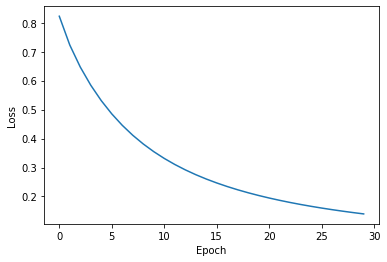

In [252]:
np.random.seed(1)
X = np.array([[0,1,0],[1,0,0],[1,1,1],[0,1,1]])
y = np.array([[0,1,1,0]]).T

mod = singleFNN(1, 30)
mod.fit(X,y)

mod.plot_loss()

### 2. Multiple Layers FNN

In [265]:
# Multipler layer FNN


# Sigmoid function     
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Binary Cross Entropy loss function
def binceloss(y, y_pred):
    N = y.shape[0]
    loss = -1/N * np.sum((y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))
    return loss

# tanh function
def dtanh(x):
    return (1 - np.power(x, 2))

# Derivative of Binary Cross Entropy loss 
def dbceloss(y, y_pr):
    return y_pr - y
    

    
    
class multiFNN:
    
    
    def __init__(self, alpha, epoch, n_layers, hid_dim):
        self.alpha = alpha
        self.epoch = epoch
        self.n_layers = n_layers
        self.hid_dim = hid_dim 
        self.losses = []

    
    def fit(self, X, y):
        
        params = {}
        for l in range(1, self.n_layers + 1):
            if(l == 1):
                params['W' + str(l)] = 2*np.random.random((X.shape[1] ,self.hid_dim))-1
            elif(l == self.n_layers):
                params['W' + str(l)] = 2*np.random.random((self.hid_dim, y.shape[1]))-1
            else:
                params['W' + str(l)] = 2*np.random.random((self.hid_dim, self.hid_dim))-1
                print("333")
            params['b' + str(l)] = 0

        
        


        for i in range(self.epoch):
            
            # foward propagation
            cash = {}
            A = X
            cash['A0'] = A
            for l in range(1, self.n_layers + 1):
                Z = np.dot(A, params['W' + str(l)]) + params['b' + str(l)]
                if(l == self.n_layers):
                    A = sigmoid(Z)
                else:
                    A = np.tanh(Z)
                cash['A' + str(l)] = A
                

            # loss calculation
 
            loss = binceloss(y, A)
            self.losses.append(loss)
            print('Epoch:', i, ' Loss:', loss)


            # backword propagation
            dparam = {}
            
            for l in range(self.n_layers , 0, -1):
                if(l == self.n_layers):
                    dparam['dZ' + str(l)] = dbceloss(y, cash['A' + str(l)])  
            
                else:
                    dparam['dZ' + str(l)] = dparam['dZ' + str(l+1)].dot(dparam['dW' + str(l+1)].T) * dtanh(cash['A' + str(l)])
                    
                dparam['dW' + str(l)] = (cash['A' + str(l-1)].T).dot(dparam['dZ' + str(l)])
                dparam['db' + str(l)] = np.sum(dparam['dZ' + str(l)], axis=0, keepdims=True)
            
            # update parameters
            for l in range(1, self.n_layers+1):
                params['W' + str(l)] -=  self.alpha * dparam['dW' + str(l)]
                params['b' + str(l)] -=  self.alpha * dparam['db' + str(l)]


            
    def predict(self, X):
        A = X
        for l in range(1, self.n_layers):
            Z = A.dot(params['W' + str(l)]) + params['b' + str(l)]
            A = sigmoid(Z)
        return A
    
    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show

Epoch: 0  Loss: 0.8284552444687141
Epoch: 1  Loss: 0.7762703497591235
Epoch: 2  Loss: 0.7309609302764575
Epoch: 3  Loss: 0.6996400870164419
Epoch: 4  Loss: 0.7049072850240498
Epoch: 5  Loss: 0.6917270025570272
Epoch: 6  Loss: 0.6938954534335727
Epoch: 7  Loss: 0.6908640523107075
Epoch: 8  Loss: 0.6918027559399514
Epoch: 9  Loss: 0.6908288932769509
Epoch: 10  Loss: 0.6912276001443198
Epoch: 11  Loss: 0.690867702090252
Epoch: 12  Loss: 0.6910293263597806
Epoch: 13  Loss: 0.6908874381540127
Epoch: 14  Loss: 0.6909511077483264
Epoch: 15  Loss: 0.6908931861215865
Epoch: 16  Loss: 0.6909177272873566
Epoch: 17  Loss: 0.6908935589900382
Epoch: 18  Loss: 0.690902794588911
Epoch: 19  Loss: 0.6908925393931624


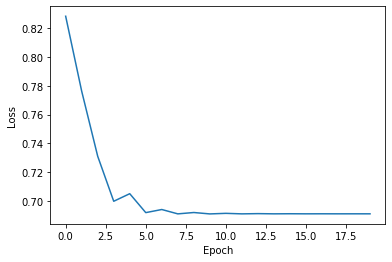

In [254]:
np.random.seed(1)
X = np.array([[0,1,0],[1,0,0],[1,1,1],[0,1,1]])
y = np.array([[0,1,1,0]]).T

mod2 = multiFNN(1, 20, 2, 2)
mod2.fit(X,y)

mod2.plot_loss()

### 3. FNN using Tensor Flow

In [267]:
# Download data 
import sklearn

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)

In [257]:
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()
model.add(Dense(3,input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

Using TensorFlow backend.


In [261]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [268]:
history = model.fit(X,y,epochs=100)

Epoch 1/100
200/200 [==============================] - 0s 173us/step - loss: 0.2860 - acc: 0.8800
Epoch 2/100
200/200 [==============================] - 0s 162us/step - loss: 0.2862 - acc: 0.8750
Epoch 3/100
200/200 [==============================] - 0s 214us/step - loss: 0.2860 - acc: 0.8750
Epoch 4/100
200/200 [==============================] - 0s 85us/step - loss: 0.2861 - acc: 0.8750
Epoch 5/100
200/200 [==============================] - 0s 97us/step - loss: 0.2859 - acc: 0.8800
Epoch 6/100
200/200 [==============================] - 0s 105us/step - loss: 0.2860 - acc: 0.8800
Epoch 7/100
200/200 [==============================] - 0s 103us/step - loss: 0.2859 - acc: 0.8800
Epoch 8/100
200/200 [==============================] - 0s 150us/step - loss: 0.2859 - acc: 0.8800
Epoch 9/100
200/200 [==============================] - 0s 226us/step - loss: 0.2859 - acc: 0.8800
Epoch 10/100
200/200 [==============================] - 0s 125us/step - loss: 0.2859 - acc: 0.8800
Epoch 11/100
200/200 

200/200 [==============================] - 0s 100us/step - loss: 0.2855 - acc: 0.8800
Epoch 85/100
200/200 [==============================] - 0s 102us/step - loss: 0.2855 - acc: 0.8800
Epoch 86/100
200/200 [==============================] - 0s 81us/step - loss: 0.2855 - acc: 0.8800
Epoch 87/100
200/200 [==============================] - 0s 100us/step - loss: 0.2855 - acc: 0.8800
Epoch 88/100
200/200 [==============================] - 0s 101us/step - loss: 0.2855 - acc: 0.8800
Epoch 89/100
200/200 [==============================] - 0s 109us/step - loss: 0.2855 - acc: 0.8800
Epoch 90/100
200/200 [==============================] - 0s 94us/step - loss: 0.2855 - acc: 0.8800
Epoch 91/100
200/200 [==============================] - 0s 94us/step - loss: 0.2855 - acc: 0.8800
Epoch 92/100
200/200 [==============================] - 0s 82us/step - loss: 0.2855 - acc: 0.8800
Epoch 93/100
200/200 [==============================] - 0s 85us/step - loss: 0.2854 - acc: 0.8800
Epoch 94/100
200/200 [======